In [1]:
library(car)
library(leaps)
library(knitr)
library(kableExtra)

Loading required package: carData



In [2]:
ames_housing <- read.table("https://raw.githubusercontent.com/AllenCheng5186/STAT306-G14-Group-Project/refs/heads/main/data/ames-housing.csv", sep = ",", header=T)

ames_housing$SalePrice <- ames_housing$SalePrice / 10000

- fence no every type of residence need a fence, most of them are NA
- all qualities variables they are objective

In [ ]:
# price divided by 1000 

# model selection (forward R^2, backward max p-value, CP)
# fit linear model with all covariates
# multi-collinearity check correlation among covariates (VIF)
# assumptions
# residual pattern -> transformation
# interaction term
# (optional) outlier, leverage, influence
# anova

house = ames_housing[, c("SalePrice","Overall.Qual", "Gr.Liv.Area", "Garage.Area", 
                         "Year.Built", "Lot.Area", "Bedroom.AbvGr", "Kitchen.AbvGr", "Lot.Shape")]

house[sapply(house, is.character)] <- lapply(house[sapply(house, is.character)], as.factor)
house$Overall.Qual <- as.factor(house$Overall.Qual)
house[is.na(house)] <- 0

head(house)

,SalePrice,Overall.Qual,Gr.Liv.Area,Garage.Area,Year.Built,Lot.Area,Bedroom.AbvGr,Kitchen.AbvGr,Lot.Shape
,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<fct>
1,21.50,6,1656,528,1960,31770,3,1,IR1
2,10.50,5,896,730,1961,11622,2,1,Reg
3,17.20,6,1329,312,1958,14267,3,1,IR1
4,24.40,7,2110,522,1968,11160,3,1,Reg
5,18.99,5,1629,482,1997,13830,3,1,IR1
6,19.55,6,1604,470,1998,9978,3,1,IR1


1. fit linear model with all covariates
2. multi-collinearity check correlation among covariates (VIF)
3. assumptions
4. residual pattern -> transformation
5. model selection (forward R^2, backward max p-value, CP)
6. interaction term
7. (optional) outlier, leverage, influence
8. anova

In [4]:
str(house)

'data.frame':	2930 obs. of  9 variables:
 $ SalePrice    : num  21.5 10.5 17.2 24.4 19 ...
 $ Overall.Qual : Factor w/ 10 levels "1","2","3","4",..: 6 5 6 7 5 6 8 8 8 7 ...
 $ Gr.Liv.Area  : int  1656 896 1329 2110 1629 1604 1338 1280 1616 1804 ...
 $ Garage.Area  : num  528 730 312 522 482 470 582 506 608 442 ...
 $ Year.Built   : int  1960 1961 1958 1968 1997 1998 2001 1992 1995 1999 ...
 $ Lot.Area     : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Bedroom.AbvGr: int  3 2 3 3 3 3 2 2 2 3 ...
 $ Kitchen.AbvGr: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Lot.Shape    : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...


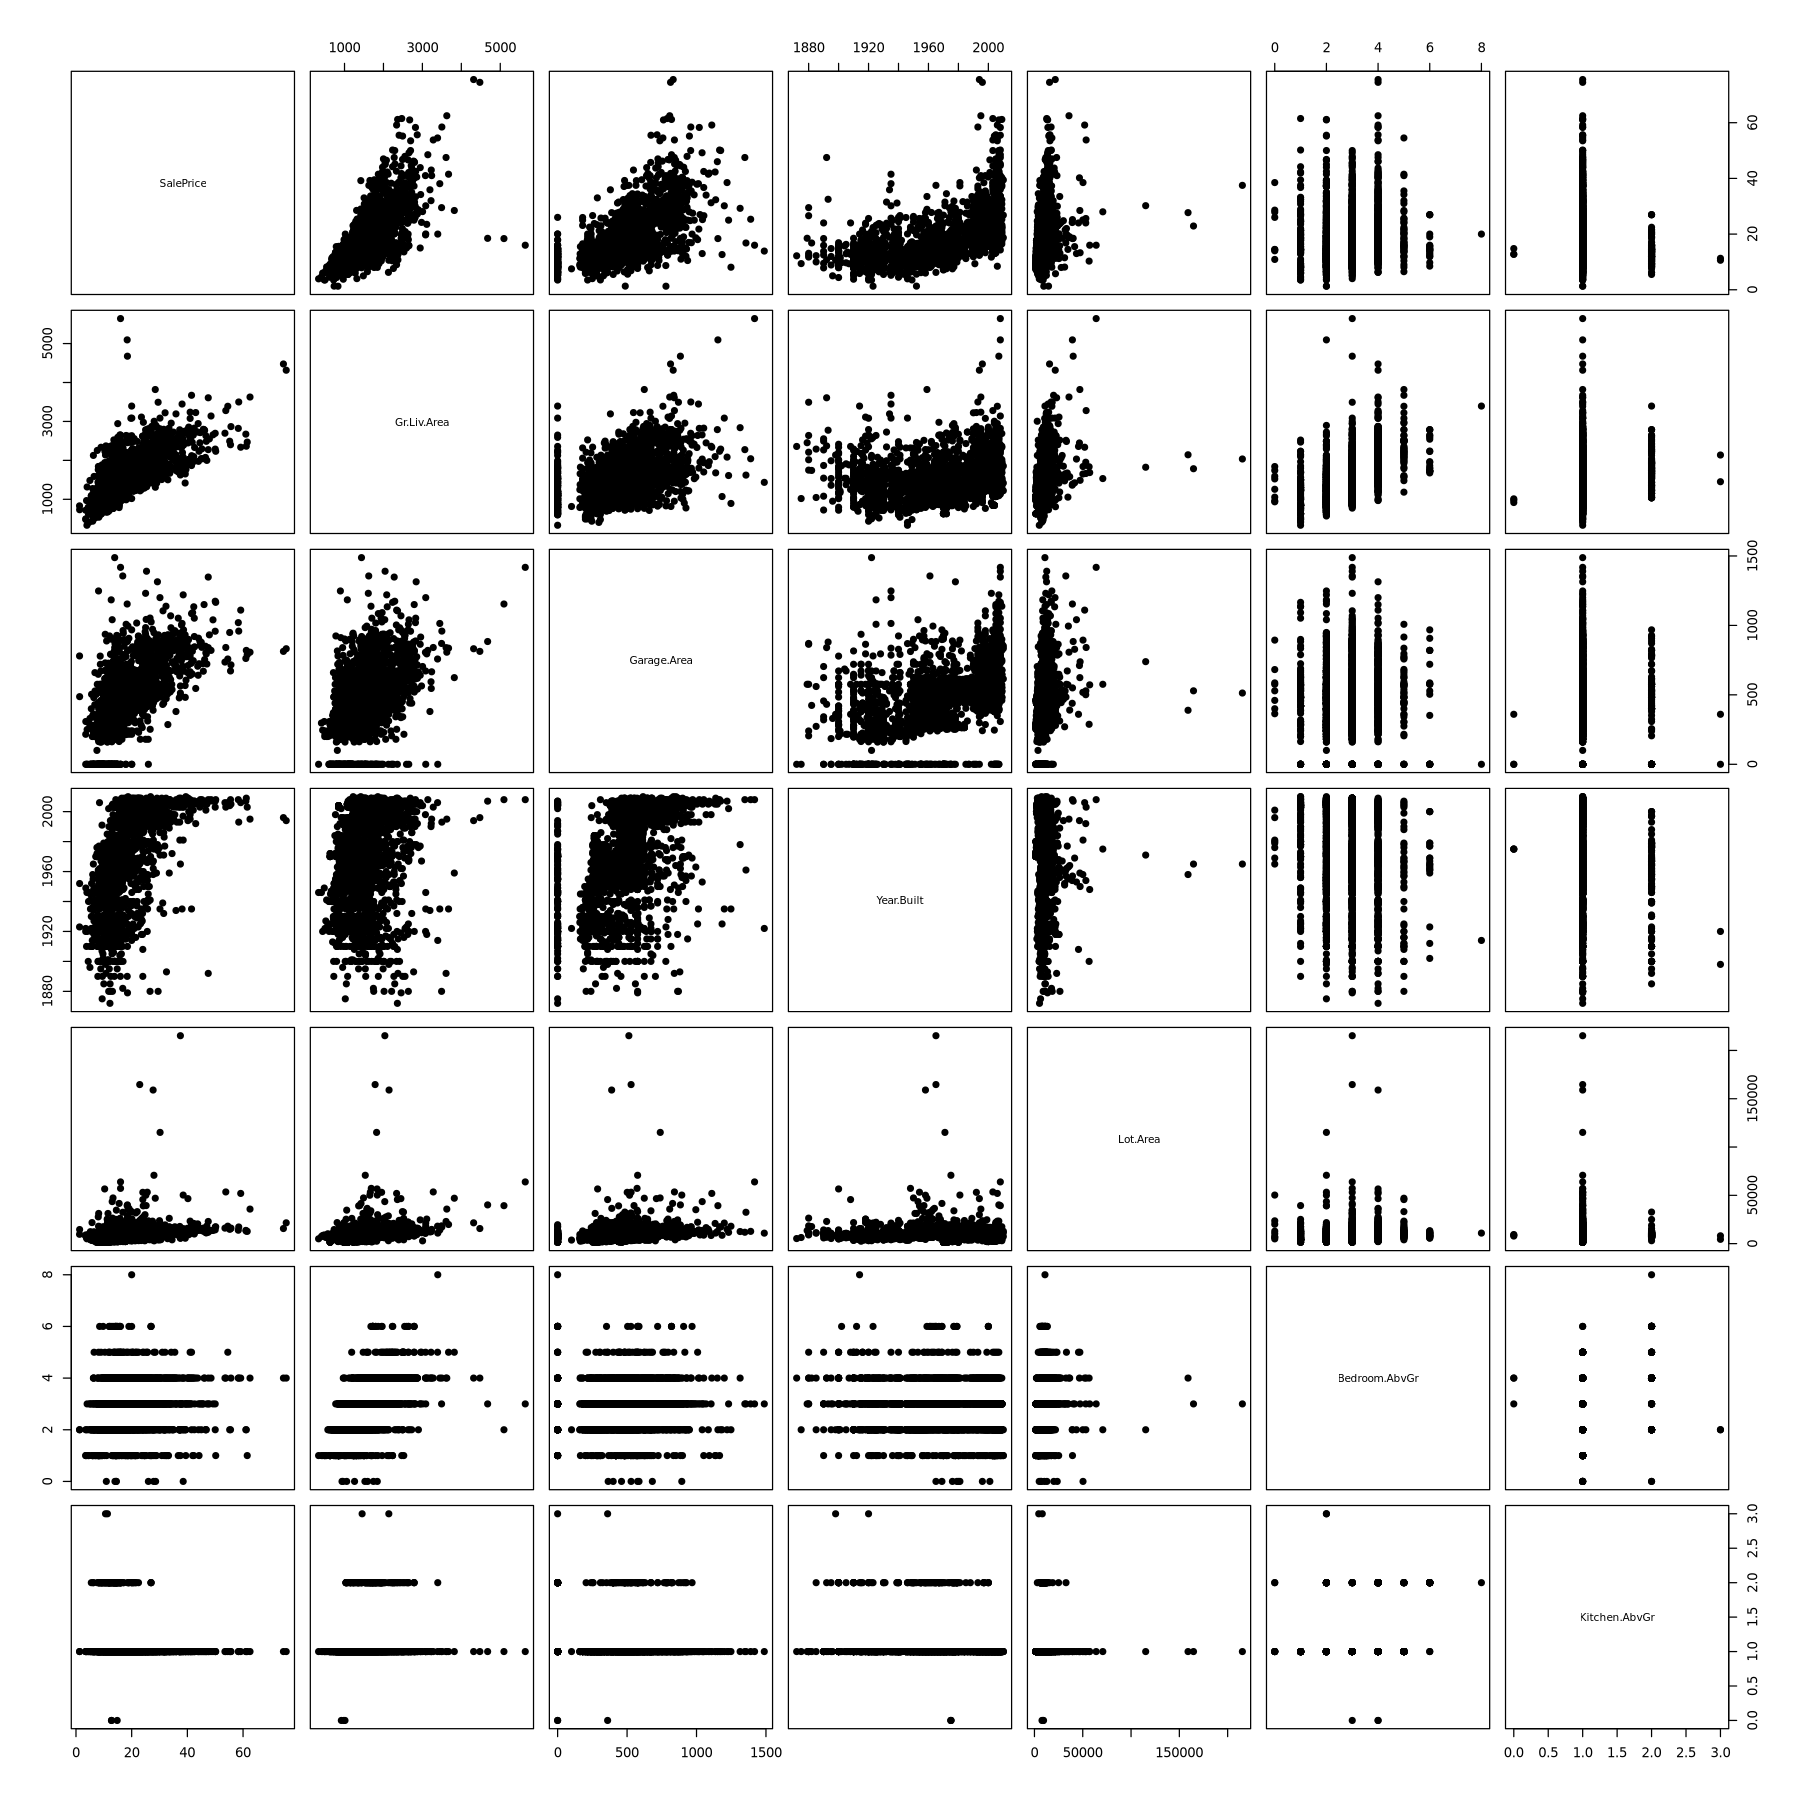

In [5]:
options(repr.plot.width = 15, repr.plot.height = 15)

pairs(house[,-c(2, 9, 11)], pch=19)

In [6]:
round(cor(house[,!(names(house) %in% c("Overall.Qual","Lot.Shape"))]), 3)

,SalePrice,Gr.Liv.Area,Garage.Area,Year.Built,Lot.Area,Bedroom.AbvGr,Kitchen.AbvGr
SalePrice,1.000,0.707,0.640,0.558,0.267,0.144,-0.120
Gr.Liv.Area,0.707,1.000,0.484,0.242,0.286,0.517,0.118
Garage.Area,0.640,0.484,1.000,0.481,0.213,0.073,-0.058
Year.Built,0.558,0.242,0.481,1.000,0.023,-0.055,-0.138
Lot.Area,0.267,0.286,0.213,0.023,1.000,0.137,-0.020
Bedroom.AbvGr,0.144,0.517,0.073,-0.055,0.137,1.000,0.241
Kitchen.AbvGr,-0.120,0.118,-0.058,-0.138,-0.020,0.241,1.000


In [7]:
house_numeric_only = house[, sapply(house, is.numeric)]
house_numeric_lreg = lm(SalePrice ~ ., data = house_numeric_only)

vif(house_numeric_lreg)

Gr.Liv.Area   Garage.Area    Year.Built      Lot.Area Bedroom.AbvGr 
     1.961712      1.667759      1.353542      1.111787      1.515821 
Kitchen.AbvGr 
     1.085901

In [8]:
full_linear_reg = lm(SalePrice~.,data = house)
summary(full_linear_reg)


Call:
lm(formula = SalePrice ~ ., data = house)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.642  -1.526  -0.078   1.327  22.062 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -8.731e+01  5.578e+00 -15.652  < 2e-16 ***
Overall.Qual2   2.341e+00  1.883e+00   1.243 0.213813    
Overall.Qual3   3.916e+00  1.728e+00   2.266 0.023508 *  
Overall.Qual4   4.889e+00  1.663e+00   2.940 0.003305 ** 
Overall.Qual5   6.367e+00  1.654e+00   3.850 0.000121 ***
Overall.Qual6   6.997e+00  1.657e+00   4.223 2.48e-05 ***
Overall.Qual7   8.628e+00  1.664e+00   5.186 2.29e-07 ***
Overall.Qual8   1.284e+01  1.675e+00   7.665 2.42e-14 ***
Overall.Qual9   2.036e+01  1.702e+00  11.962  < 2e-16 ***
Overall.Qual10  2.360e+01  1.793e+00  13.160  < 2e-16 ***
Gr.Liv.Area     5.988e-03  2.037e-04  29.403  < 2e-16 ***
Garage.Area     3.672e-03  3.758e-04   9.771  < 2e-16 ***
Year.Built      4.553e-02  2.720e-03  16.737  < 2e-16 ***
Lot.Area        8.676e-05  8.5

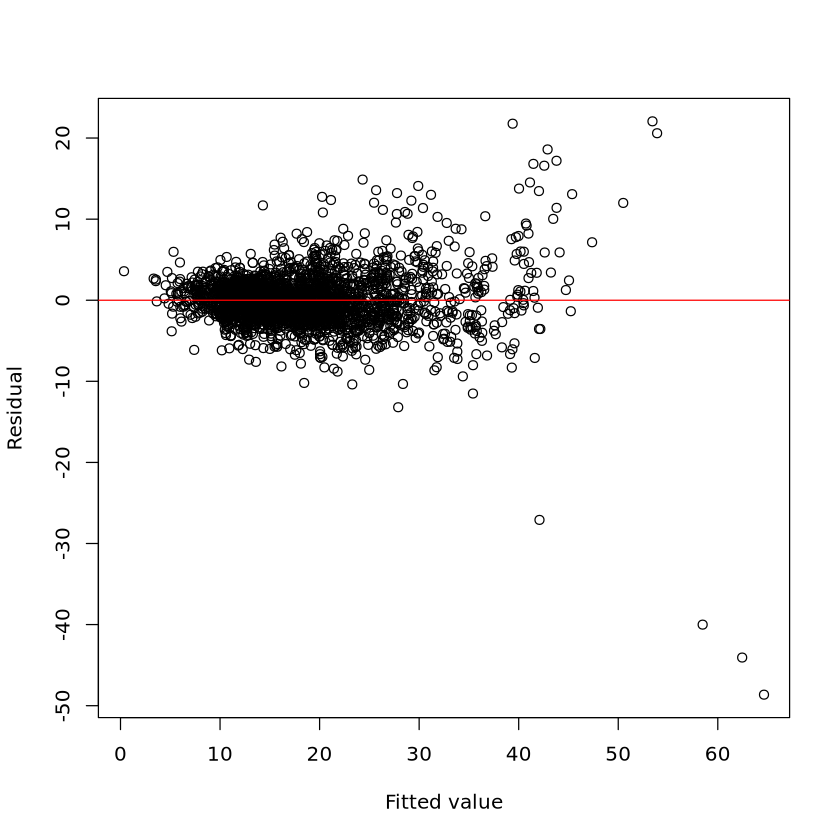

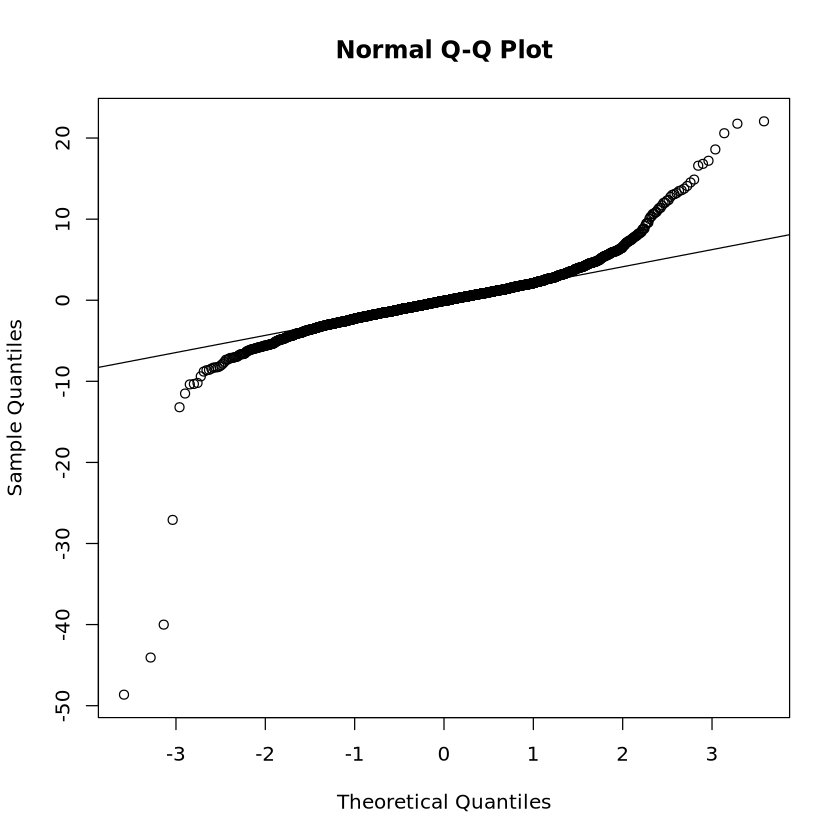

In [9]:
options(repr.plot.width = 7, repr.plot.height = 7)

# assumptions check
    # residual plot
plot(full_linear_reg$fitted.values, full_linear_reg$residuals,
     xlab="Fitted value", ylab="Residual")
abline(h = 0, col = "red")

# assumptions check
    # qqplot
qqnorm(full_linear_reg$residuals)
qqline(full_linear_reg$residuals)

residual pattern -> transformation

funnel pattern -> assumption violatied: homoscedasticity $Var(\Sigma) = \sigma^2$

use $log(Y)$

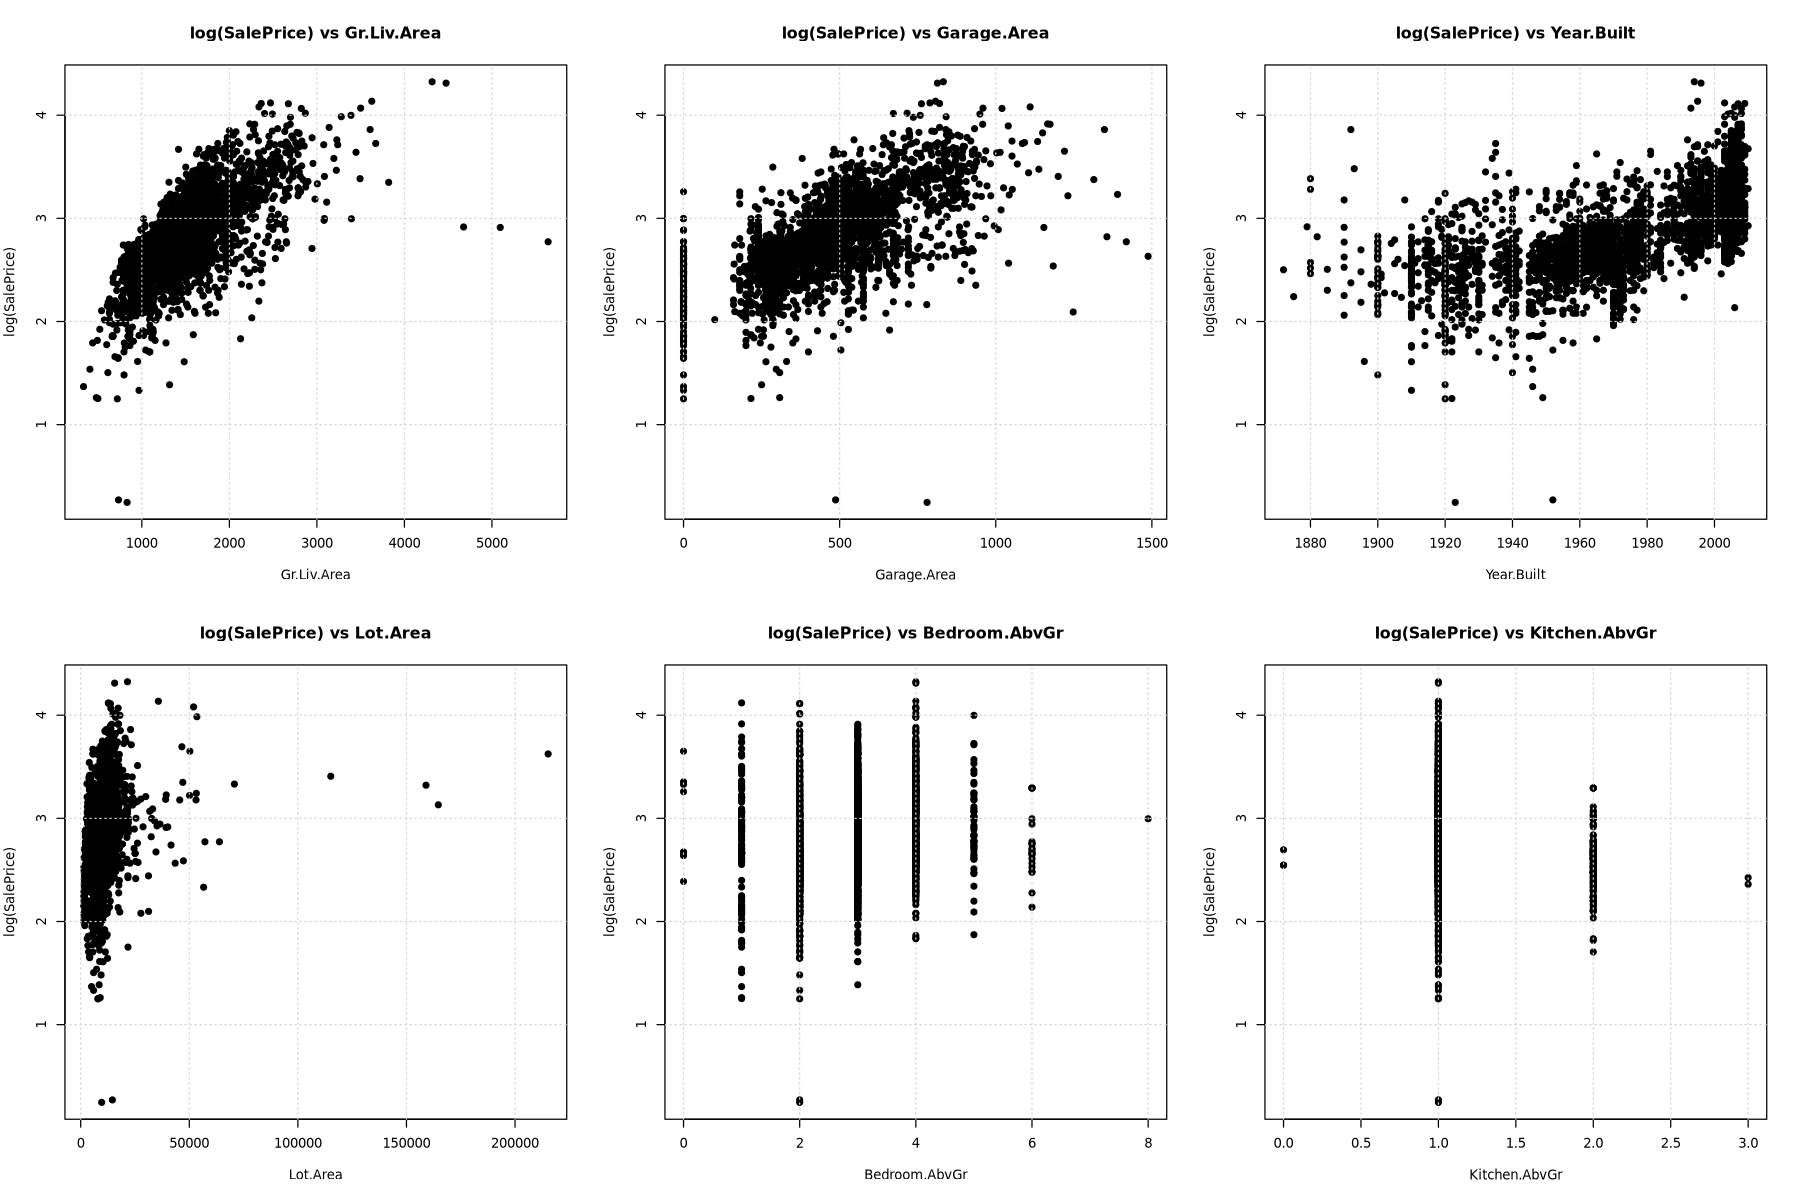

In [10]:
num_vars <- names(house)[sapply(house, is.numeric)]
predictors <- setdiff(num_vars, c("SalePrice", "log_SalePrice"))

options(repr.plot.width = 15, repr.plot.height = 10)
par(mfrow = c(2, 3))

for (var in predictors) {
  plot(house[[var]], log(house$SalePrice), pch=19,
       xlab = var, ylab = "log(SalePrice)",
       main = paste("log(SalePrice) vs", var))
  grid()
}

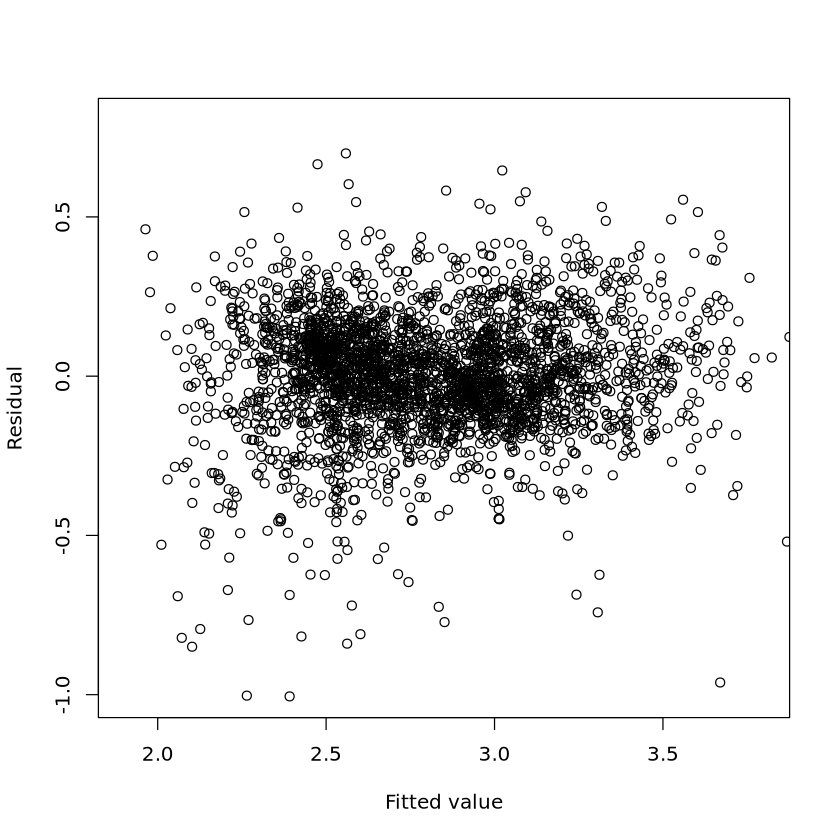

In [11]:
options(repr.plot.width = 7, repr.plot.height = 7)

reg_logY = lm(log(SalePrice) ~ Gr.Liv.Area+ Garage.Area + Year.Built + Lot.Area + Bedroom.AbvGr + Kitchen.AbvGr, data = house)

plot(x = reg_logY$fitted.values, y = reg_logY$residuals,
     xlim = c(1.9, 3.8), ylim =c(-1.0, 0.8),  #TODO outlier in residual plot
     xlab="Fitted value", ylab="Residual")

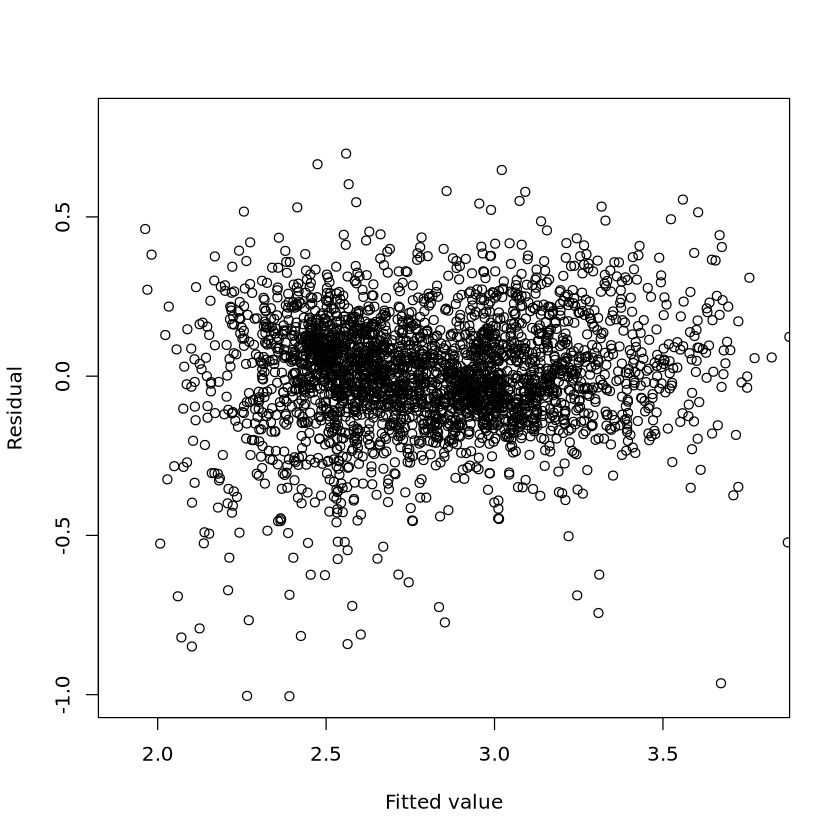

In [12]:
options(repr.plot.width = 7, repr.plot.height = 7)

reg_logY_logYear = lm(log(SalePrice) ~ Gr.Liv.Area+ Garage.Area + log(Year.Built) + Lot.Area + Bedroom.AbvGr + Kitchen.AbvGr, data = house)

plot(x = reg_logY_logYear$fitted.values, y = reg_logY_logYear$residuals,
     xlim = c(1.9, 3.8), ylim =c(-1.0, 0.8),  #TODO outlier in residual plot
     xlab="Fitted value", ylab="Residual")

In [ ]:
s <- regsubsets(SalePrice ~ ., data = house, method = "exhaustive") # TODO which method
ss <- summary(s)

# kable(s_summary, format = "latex", booktabs = TRUE) %>%
#   kable_styling(latex_options = c("scale_down", "hold_position"))

View(summary(s)$which)



,(Intercept),Overall.Qual2,Overall.Qual3,Overall.Qual4,Overall.Qual5,Overall.Qual6,Overall.Qual7,Overall.Qual8,Overall.Qual9,Overall.Qual10,Gr.Liv.Area,Garage.Area,Year.Built,Lot.Area,Bedroom.AbvGr,Kitchen.AbvGr,Lot.ShapeIR2,Lot.ShapeIR3,Lot.ShapeReg
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
8,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE


In [23]:
predictors <- setdiff(names(house), "SalePrice")

# Initialize with the null model (intercept only)
current_formula <- as.formula("SalePrice ~ 1")
current_model <- lm(current_formula, data = house)
aic_values <- c(AIC(current_model))
num_predictors <- 0
selected <- c()

# Forward selection: iteratively add one predictor that gives the lowest AIC.
for(i in 1:length(predictors)) {
  remaining <- setdiff(predictors, selected)
  
  aic_candidates <- sapply(remaining, function(var) {
    new_formula <- as.formula(paste("SalePrice ~", paste(c(selected, var), collapse = " + ")))
    AIC(lm(new_formula, data = house))
  })
  
  best_var <- names(which.min(aic_candidates))
  selected <- c(selected, best_var)
  
  current_formula <- as.formula(paste("SalePrice ~", paste(selected, collapse = " + ")))
  current_model <- lm(current_formula, data = house)
  
  aic_values <- c(aic_values, AIC(current_model))
  num_predictors <- c(num_predictors, length(selected))
}

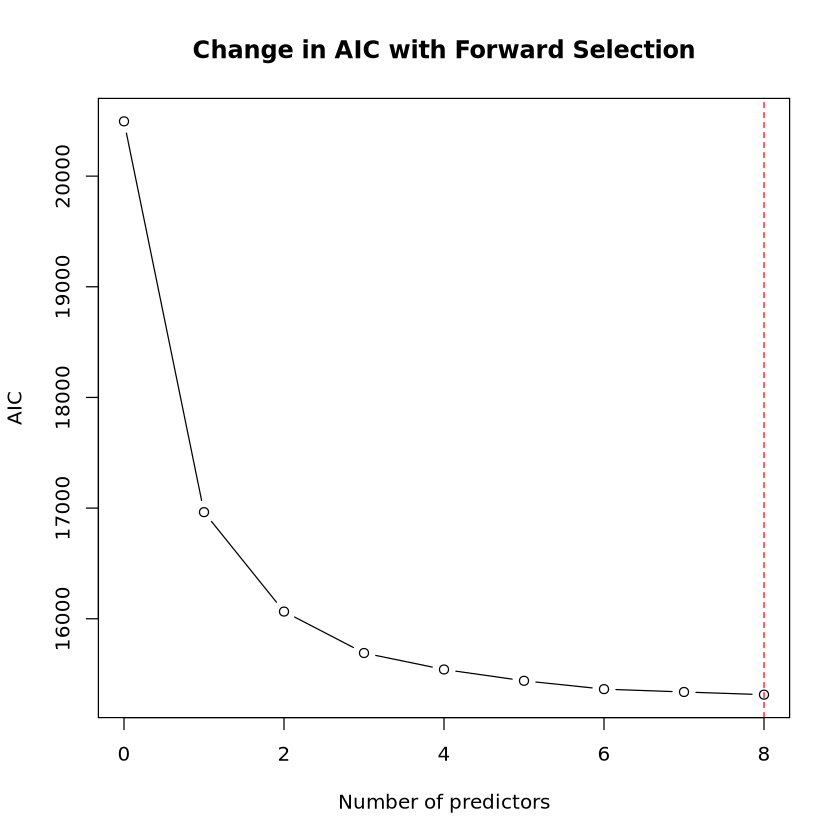

In [24]:
# Plot AIC vs. number of predictors
plot(0:length(predictors), aic_values, type = "b",
     xlab = "Number of predictors", ylab = "AIC",
     main = "Change in AIC with Forward Selection")

min_index <- which.min(aic_values)
min_num_pred <- num_predictors[min_index]
abline(v = min_num_pred, col = "red", lty = 2)

In [25]:
s = regsubsets(SalePrice~., data=house, method="backward")
ss = summary(s)
ss

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = house, method = "backward")
18 Variables  (and intercept)
               Forced in Forced out
Overall.Qual2      FALSE      FALSE
Overall.Qual3      FALSE      FALSE
Overall.Qual4      FALSE      FALSE
Overall.Qual5      FALSE      FALSE
Overall.Qual6      FALSE      FALSE
Overall.Qual7      FALSE      FALSE
Overall.Qual8      FALSE      FALSE
Overall.Qual9      FALSE      FALSE
Overall.Qual10     FALSE      FALSE
Gr.Liv.Area        FALSE      FALSE
Garage.Area        FALSE      FALSE
Year.Built         FALSE      FALSE
Lot.Area           FALSE      FALSE
Bedroom.AbvGr      FALSE      FALSE
Kitchen.AbvGr      FALSE      FALSE
Lot.ShapeIR2       FALSE      FALSE
Lot.ShapeIR3       FALSE      FALSE
Lot.ShapeReg       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         Overall.Qual2 Overall.Qual3 Overall.Qual4 Overall.Qual5 Overall.Qual6
1  ( 1 ) " "           " "           " "       

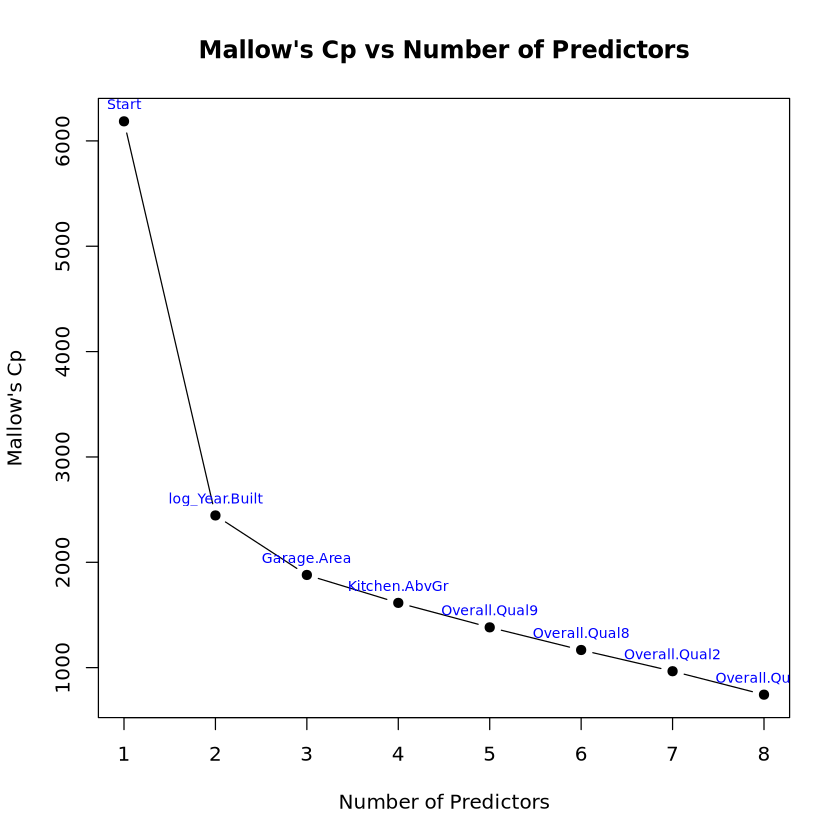

In [46]:
# {r fig.height=5,fig.width=5}
house$log_SalePrice = log(house$SalePrice)
house$log_Year.Built = log(house$Year.Built)

log_full_model = lm(log_SalePrice ~ Overall.Qual + Gr.Liv.Area + Garage.Area + 
                    log_Year.Built + Lot.Area + Bedroom.AbvGr + Kitchen.AbvGr + 
                    Lot.Shape, data = house)

# summary(log_full_model)

s <- regsubsets(log_SalePrice ~ Overall.Qual + Gr.Liv.Area + Garage.Area + 
                    log_Year.Built + Lot.Area + Bedroom.AbvGr + Kitchen.AbvGr + 
                    Lot.Shape, data = house, method = "forward") 

ss <- summary(s)

# s_summary <- as.data.frame(summary(s)$outmat)
# kable(s_summary, format = "latex", booktabs = TRUE) %>%
#   kable_styling(latex_options = c("scale_down", "hold_position"))

cps <- ss$cp
num_predictors <- apply(ss$which, 1, function(x) sum(x) - 1) 

model_matrix <- ss$which[, -1, drop = FALSE]  
model_names <- colnames(model_matrix)

added_vars <- character(nrow(model_matrix))
for (i in 2:nrow(model_matrix)) {
  prev <- model_matrix[i - 1, ]
  curr <- model_matrix[i, ]
  new_var <- setdiff(model_names[curr & !prev], model_names[prev])
  added_vars[i] <- ifelse(length(new_var) > 0, new_var, "")
}
added_vars[1] <- "Start"  

plot(num_predictors, cps, type = "b", pch = 19,
     xlab = "Number of Predictors", ylab = "Mallow's Cp",
     main = "Mallow's Cp vs Number of Predictors")
text(num_predictors, cps, labels = added_vars, pos = 3, cex = 0.7, col = "blue")
# abline(a = 1, b = 1, col = "red", lty = 2)

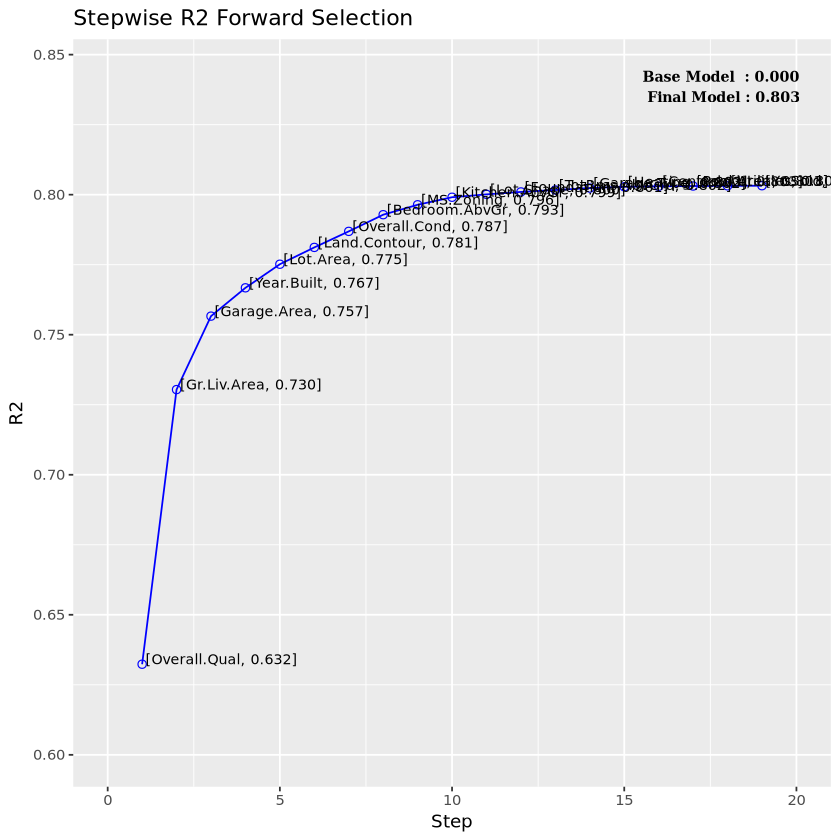

In [ ]:
# ggplot(forward_sel$metrics, aes(x = step, y = r2)) +
#   geom_line() +
#   geom_point() +
#   geom_vline(xintercept = which.max(forward_sel$metrics$r2),
#              linetype = "dashed", color = "red") +
#   labs(x = "Number of Predictors", y = "R-squared",
#        title = "Forward Selection: R² by Step") +
#   theme_minimal()

plot(forward_sel)

In [33]:
# Final model
best_model <- forward_sel$model
summary(best_model)


Call:
lm(formula = paste(response, "~", paste(preds, collapse = " + ")), 
    data = l)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.642  -1.526  -0.078   1.327  22.062 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -8.731e+01  5.578e+00 -15.652  < 2e-16 ***
Overall.Qual2   2.341e+00  1.883e+00   1.243 0.213813    
Overall.Qual3   3.916e+00  1.728e+00   2.266 0.023508 *  
Overall.Qual4   4.889e+00  1.663e+00   2.940 0.003305 ** 
Overall.Qual5   6.367e+00  1.654e+00   3.850 0.000121 ***
Overall.Qual6   6.997e+00  1.657e+00   4.223 2.48e-05 ***
Overall.Qual7   8.628e+00  1.664e+00   5.186 2.29e-07 ***
Overall.Qual8   1.284e+01  1.675e+00   7.665 2.42e-14 ***
Overall.Qual9   2.036e+01  1.702e+00  11.962  < 2e-16 ***
Overall.Qual10  2.360e+01  1.793e+00  13.160  < 2e-16 ***
Gr.Liv.Area     5.988e-03  2.037e-04  29.403  < 2e-16 ***
Year.Built      4.553e-02  2.720e-03  16.737  < 2e-16 ***
Lot.Area        8.676e-05  8.589e-06  10.102  < 

In [32]:
backward_sel <- ols_step_backward_p(linear_reg, p_val = 0.3)

ERROR: Error in eval(expr, envir, enclos): object 'linear_reg' not found


In [ ]:
backward_sel$metrics

step,variable,r2,adj_r2,aic,sbc,sbic,mallows_cp,rmse
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Utilities,0.8031359,0.8003256,66004.95,66247.97,58096.92,38.85656,35310.11
2,Yr.Sold,0.8030864,0.8003485,66003.64,66240.74,58095.58,37.54297,35314.55
3,Heating,0.8026783,0.8003001,65999.38,66206.84,58099.22,33.20427,35351.13


[[1]]
NULL


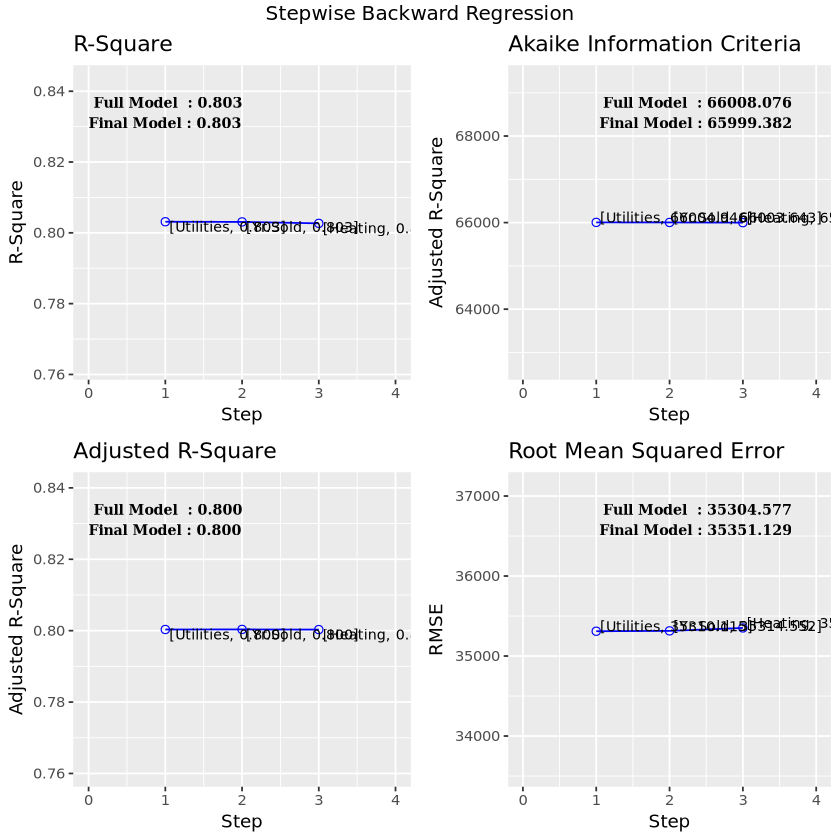

In [ ]:
plot(backward_sel)

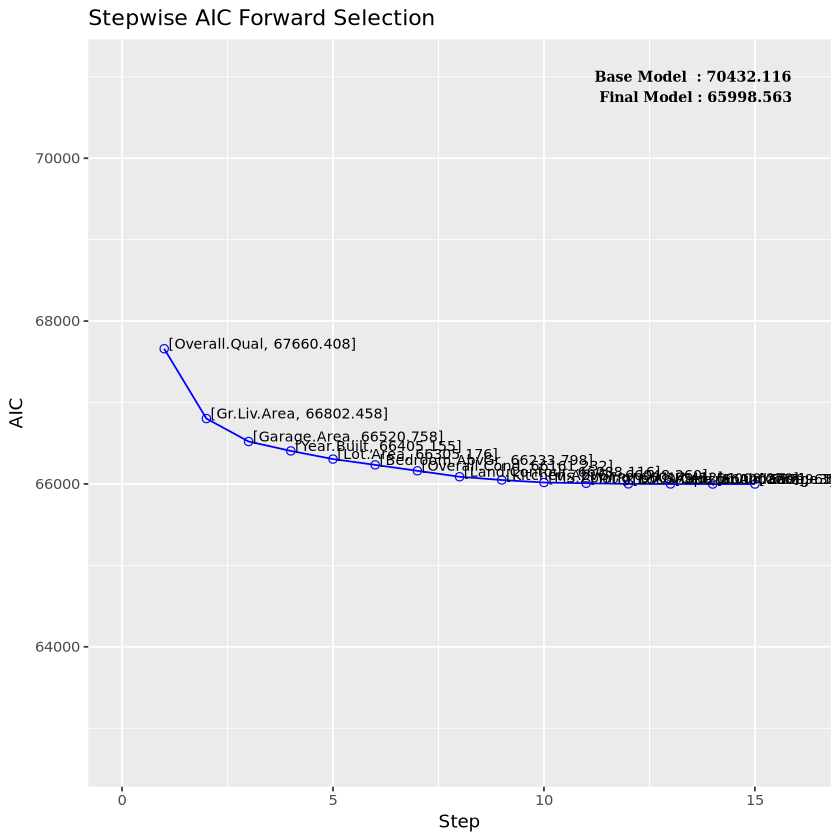

In [ ]:
forward_sel_aic = ols_step_forward_aic(linear_reg)
plot(forward_sel_aic)

In [ ]:
forward_sel_aic$metric

step,variable,r2,adj_r2,aic,sbc,sbic
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Overall.Qual,0.6323472,0.6322145,67660.41,67678.19,59791.57
2,Gr.Liv.Area,0.7304074,0.7302126,66802.46,66826.17,58934.18
3,Garage.Area,0.7566338,0.7563701,66520.76,66550.40,58652.67
4,Year.Built,0.7667428,0.7664056,66405.16,66440.72,58537.09
5,Lot.Area,0.7751681,0.7747617,66305.18,66346.67,58437.22
6,Bedroom.AbvGr,0.7810416,0.7805665,66233.80,66281.22,58365.96
7,Overall.Cond,0.7868530,0.7863132,66161.23,66214.58,58293.63
8,Land.Contour,0.7928505,0.7921002,66088.12,66159.24,58216.88
9,Kitchen.AbvGr,0.7959549,0.7951417,66048.26,66125.31,58177.25


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::group_rows() masks kableExtra::group_rows()
✖ dplyr::lag()        masks stats::lag()
✖ dplyr::recode()     masks car::recode()
✖ purrr::some()       masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formul

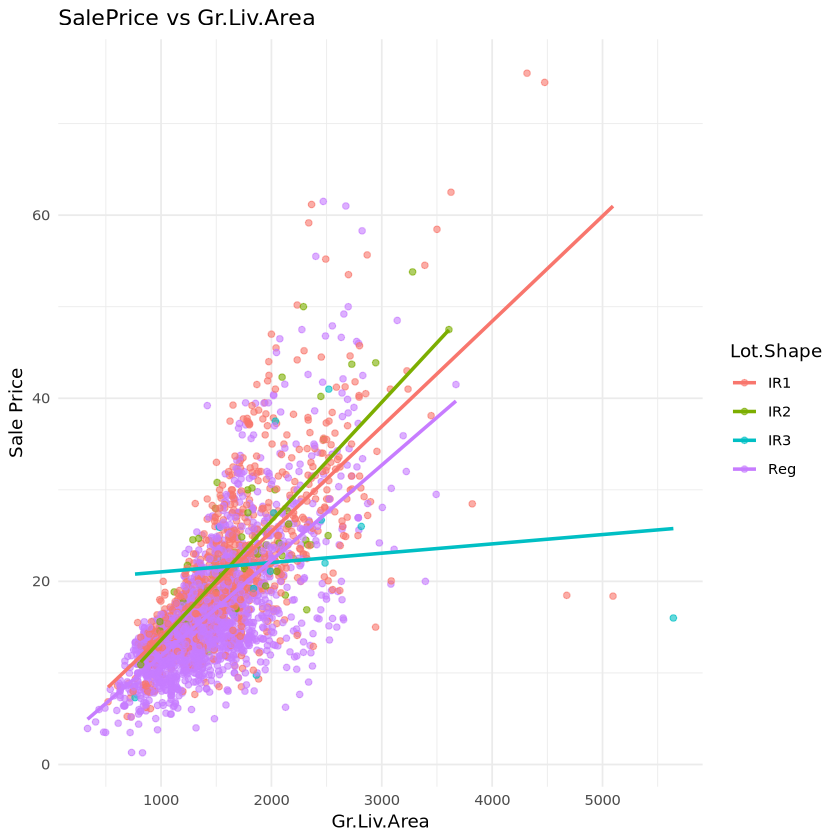

`geom_smooth()` using formula = 'y ~ x'


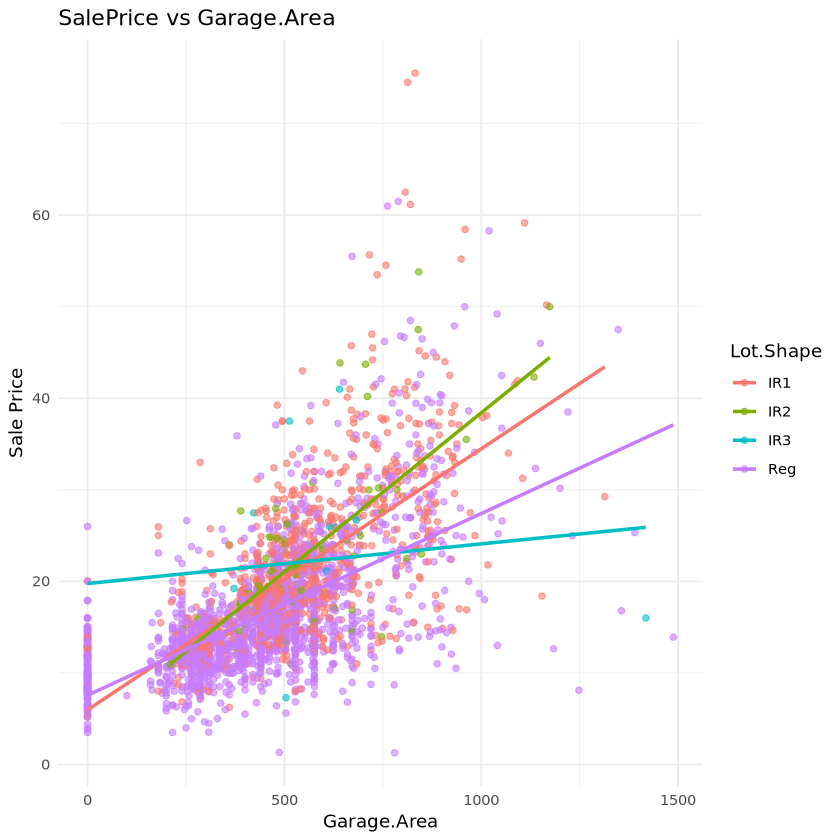

`geom_smooth()` using formula = 'y ~ x'


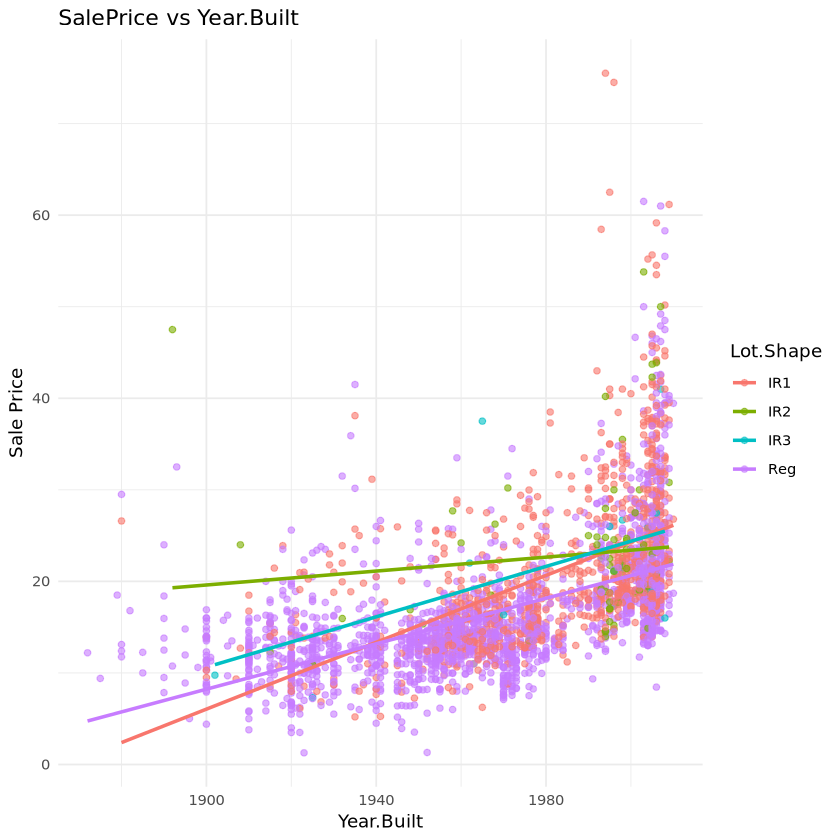

`geom_smooth()` using formula = 'y ~ x'


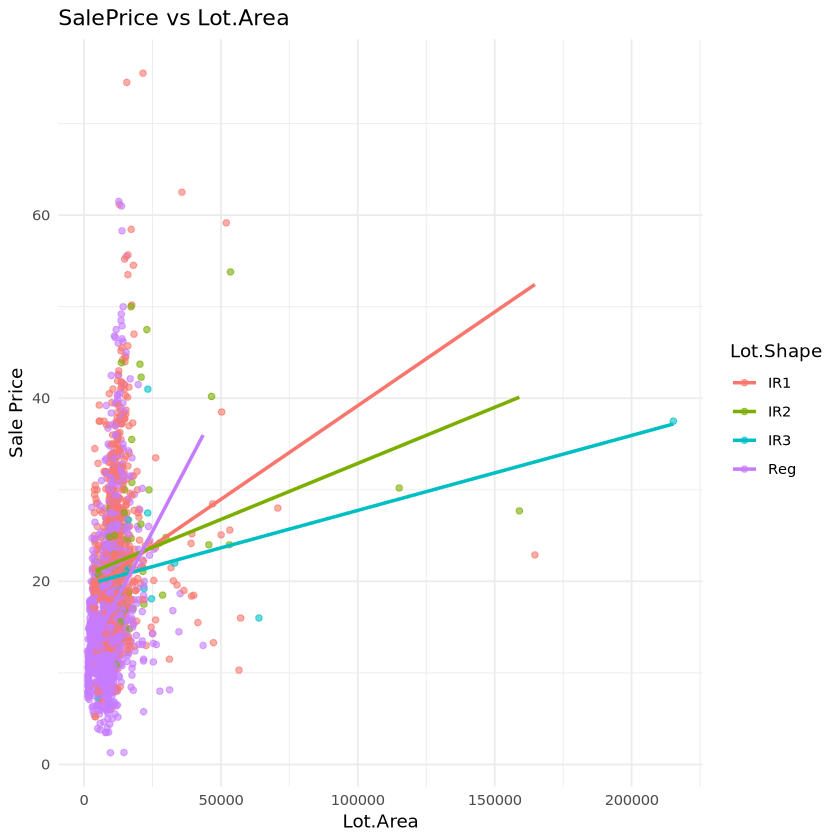

`geom_smooth()` using formula = 'y ~ x'


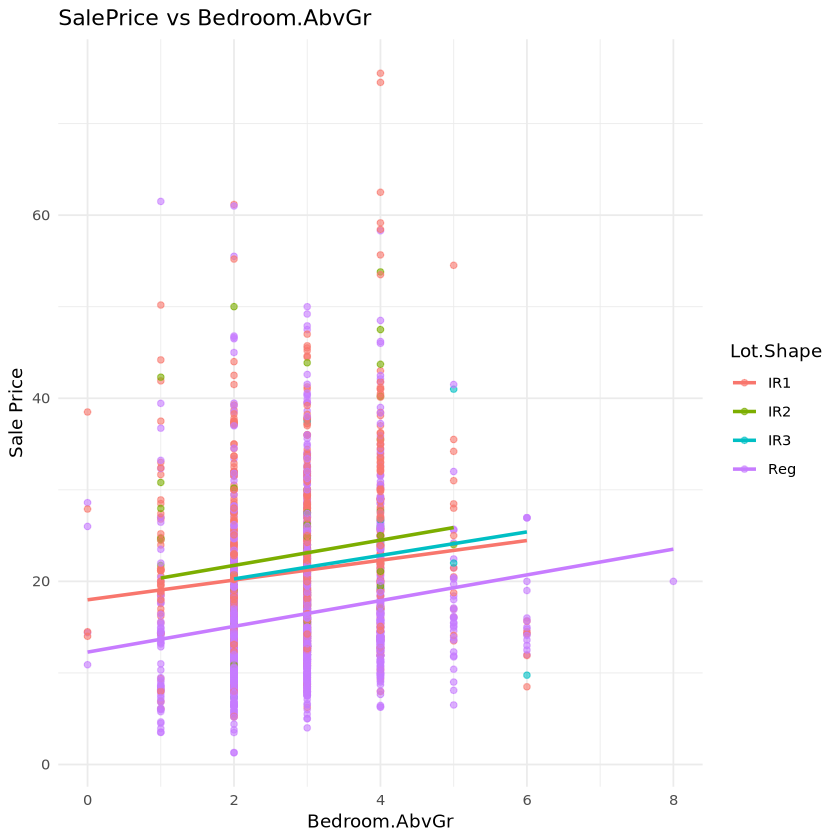

`geom_smooth()` using formula = 'y ~ x'


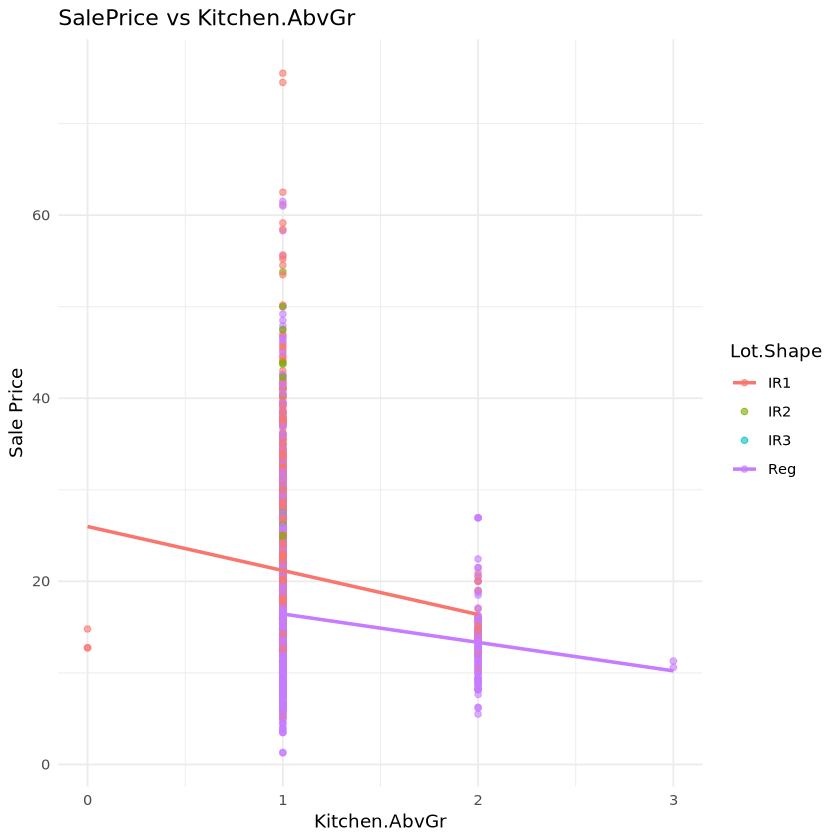

`geom_smooth()` using formula = 'y ~ x'


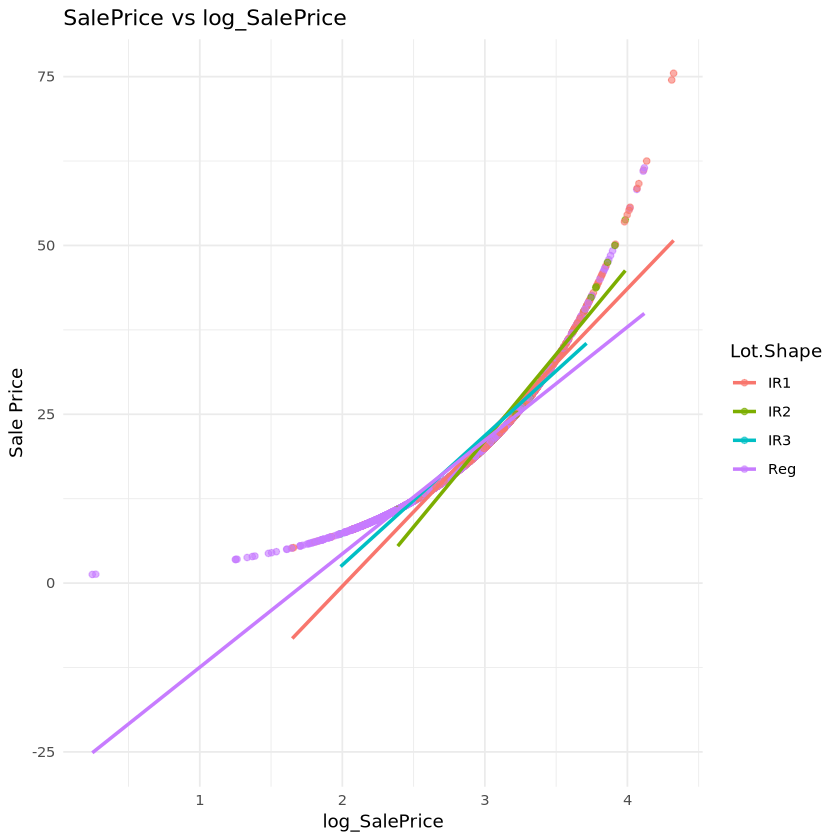

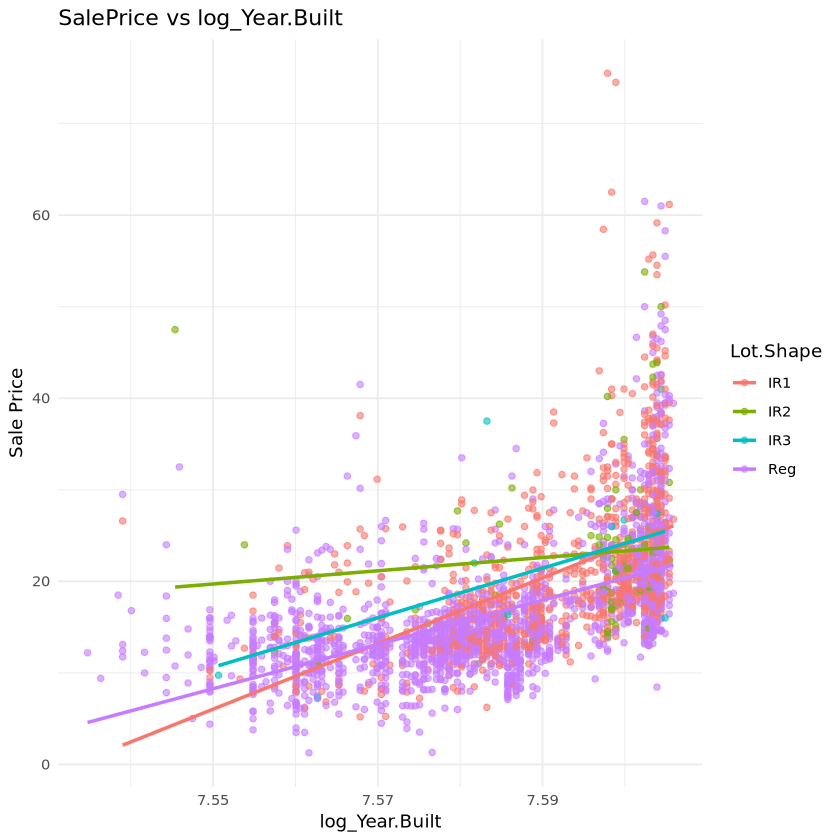

In [ ]:
library(tidyverse)
library(car)
library(ggplot2)
library(GGally)

numeric_covariates <- names(house)[sapply(house, is.numeric) & names(house) != "SalePrice"]

for (var in numeric_covariates) {
  p <- ggplot(house, aes_string(x = var, y = "SalePrice", color = "Lot.Shape")) +
    geom_point(alpha = 0.6) +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = paste("SalePrice vs", var),
         x = var, y = "Sale Price") +
    theme_minimal()
  
  print(p)
}